# macaque dataset

1.0.2


/Users/xiaokangyu/opt/anaconda3/envs/env_test/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


convert sparse to dense!!!!


/Users/xiaokangyu/opt/anaconda3/envs/env_test/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


save folder exists
Start to process resolution= 0.2
use CPU to train DESC.........
debug code in debug mode.....
=====================================DESC Model network===========================================
StackedDenoisingAutoEncoder(
  (encoder): Sequential(
    (0): Sequential(
      (linear): Linear(in_features=1000, out_features=64, bias=True)
      (activation): ReLU()
    )
    (1): Sequential(
      (linear): Linear(in_features=64, out_features=32, bias=True)
      (activation): Tanh()
    )
  )
  (decoder): Sequential(
    (0): Sequential(
      (linear): Linear(in_features=32, out_features=64, bias=True)
      (activation): ReLU()
    )
    (1): Sequential(
      (linear): Linear(in_features=64, out_features=1000, bias=True)
      (activation): Tanh()
    )
  )
)
use_ae_weights=False, the program will rerun autoencoder
DenoisingAutoencoder(
  (activation): ReLU()
  (actincenter): Tanh()
  (corruption): Dropout(p=0.2, inplace=False)
)
train 1th sub autoencoder
learning ra

100%|██████████| 119/119 [00:01<00:00, 90.50batch/s, epo=49, train_loss=0.281450]


learning rate = 0.01


100%|██████████| 119/119 [00:00<00:00, 166.92batch/s, epo=23, train_loss=0.276650]


Early stopping
learning rate = 0.001


100%|██████████| 119/119 [00:00<00:00, 137.38batch/s, epo=10, train_loss=0.268979]


Early stopping


DenoisingAutoencoder(
  (activation): ReLU()
  (actincenter): Tanh()
  (corruption): Dropout(p=0.2, inplace=False)
)
train 2th sub autoencoder
learning rate = 0.1


100%|██████████| 119/119 [00:00<00:00, 380.81batch/s, epo=49, train_loss=0.232202]


learning rate = 0.01


100%|██████████| 119/119 [00:00<00:00, 381.14batch/s, epo=14, train_loss=0.229875]


Early stopping
learning rate = 0.001


100%|██████████| 119/119 [00:00<00:00, 293.56batch/s, epo=22, train_loss=0.226730]


Early stopping
finetune autoencoder ....
Fine-tuning autoencoder end-to-end
learning rate = 1


100%|██████████| 119/119 [00:00<00:00, 170.50batch/s, epo=49, train_loss=0.265772]


learning rate = 0.1


100%|██████████| 119/119 [00:00<00:00, 174.14batch/s, epo=13, train_loss=0.242003]


Early stopping
learning rate = 0.01


100%|██████████| 119/119 [00:00<00:00, 172.49batch/s, epo=13, train_loss=0.255218]


Early stopping
learning rate = 0.001


100%|██████████| 119/119 [00:00<00:00, 170.81batch/s, epo=10, train_loss=0.251555]


Early stopping
learning rate = 0.0001


100%|██████████| 119/119 [00:00<00:00, 168.11batch/s, epo=11, train_loss=0.241977]


Early stopping
learning rate = 1e-05


100%|██████████| 119/119 [00:00<00:00, 174.74batch/s, epo=10, train_loss=0.258134]


Early stopping
Pretraining time is 214.4814121723175
Pretrained weights are saved to ./macaque_result/ae_weights.pth


...number of clusters is unknown, Initialize cluster centroid using louvain method
DEC training......,epochs_fit=5
DEC training:epoch=0......


/Users/xiaokangyu/opt/anaconda3/envs/env_test/lib/python3.6/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


DEC training:epoch=1......
DEC training:epoch=2......
DEC training:epoch=3......
DEC training:epoch=4......
DEC training:epoch=5......
DEC training:epoch=6......
Early stopping as label delta "0.00413" less than "0.00500".
DEC training weights are saved to ./macaque_result/dec_weights.pth


100%|██████████| 30/30 [00:00<00:00, 166.54batch/s]


(30302, 32)


100%|██████████| 30/30 [00:00<00:00, 136.95batch/s]


The desc has been trained successfully!!!!!!
The runtime of (resolution=0.2)is: 272.30626106262207


umap finished and added X_umap0.2  into the umap coordinates (adata.obsm)

The run time for all resolution is: 291.3588092327118
After training, the information of adata is:
 AnnData object with n_obs × n_vars = 30302 × 1000
    obs: 'batch', 'sample', 'macaque_id', 'nGene', 'nTranscripts', 'cluster', 'region', 'class', 'n_counts', 'desc_0.2'
    var: 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'umap', 'prob_matrix0.2'
    obsm: 'X_Embeded_z0.2', 'X_umap', 'X_umap0.2'
    obsp: 'distances', 'connectivities'


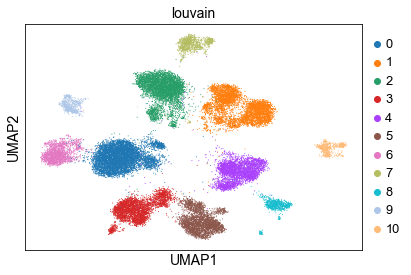

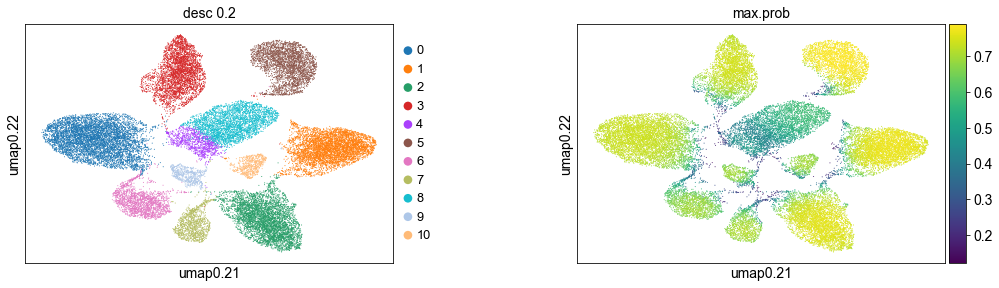

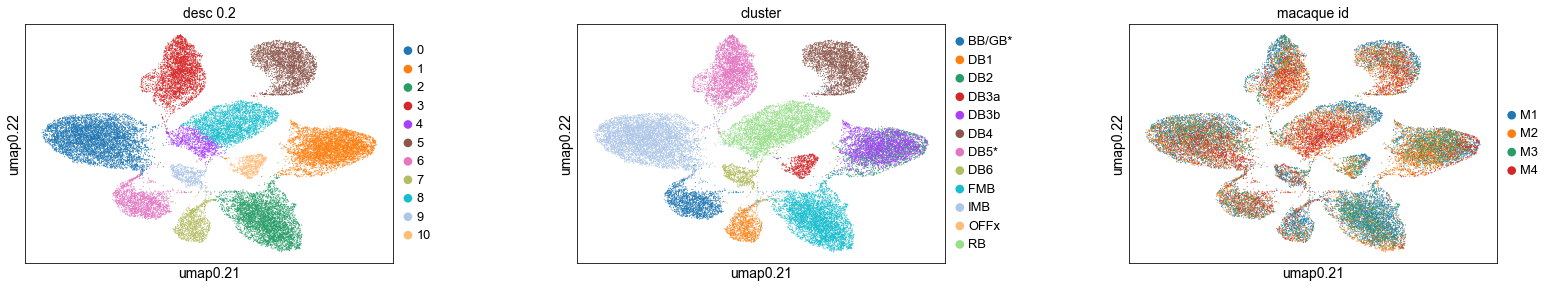

done


In [1]:
import DESCtorch 
print(DESCtorch.__version__)
import os
from DESCtorch import desc
import pandas as pd
import numpy as np
import scanpy as sc
from time import time
import sys
import matplotlib
import matplotlib.pyplot as plt
import random
sc.settings.set_figure_params(dpi=300)
from scipy.sparse import issparse

import torch
from torch.utils.data import Dataset
import torch.nn as nn
from torch.utils.data import DataLoader


###########clean screen #######
# import os
# os.system('clear')
import matplotlib 
%matplotlib inline
#matplotlib.use('Agg')# 
#####################


####################### read data and data preprocessing#############
adata=sc.read("/Users/xiaokangyu/Desktop/dataset/single_cell/macaque/macaque_bc.h5ad")

#### preprocess dataset ####
batch_key="macaque_id"
############# filtering #################
sc.pp.filter_genes(adata, min_counts=1)
sc.pp.filter_cells(adata, min_counts=1)
############# scale ####################
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=1000,subset=True,inplace=True)
## check adata is sparse!!!!
if issparse(adata.X):
    print("convert sparse to dense!!!!")
    adata.X = adata.X.toarray()
    
batch_list = np.unique(adata.obs[batch_key].values)
batch=np.array(adata.obs[batch_key].values)
for batch_ in batch_list:
    indices = [x == batch_ for x in batch]
    sub_adata = adata[indices]
    sc.pp.scale(sub_adata,max_value=10.0)
    adata[indices] = sub_adata.X
#########################################    


#################### desc training #######################
dataset="macaque"
save_dir="./"+dataset+"_result"
reso=0.2
sc.settings.figdir=save_dir

if(os.path.exists(save_dir)):
    print("save folder exists")
else:
    os.mkdir(save_dir)

filelist = [ f for f in os.listdir(os.path.join(os.getcwd(),save_dir))]
for f in filelist:
    os.remove(os.path.join(os.getcwd(),save_dir, f))
#############################################################################

#################### desc training #######################
sc.settings.figdir=save_dir
adata=desc.train(adata,
        dims=[adata.shape[1],64,32],
        tol=0.005,
        n_neighbors=10,
        batch_size=256,
        louvain_resolution=[reso],# not necessarily a list, you can only set one value, like, louvain_resolution=1.0
        save_dir=str(save_dir),
        do_tsne= False ,
        learning_rate=200, # the parameter of tsne
        device=torch.device("cpu"),
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=True,
        debug=True) #if do_uamp is False, it will don't compute umap coordiate
####################################################################################


############################## Visulizing the result of desc #######################
adata.obs['max.prob']=adata.uns["prob_matrix"+str(reso)].max(1)
# sc.pl.scatter(adata,basis="tsne"+str(reso),color=['desc_'+str(reso),'max.prob'],save="_tsne"+str(reso)+"_"+dataset+"_prob.png")
# sc.pl.scatter(adata,basis="tsne"+str(reso),color=['desc_'+str(reso),'cluster','macaque_id'],save="_tsne"+str(reso)+"_"+dataset+"_desc.png")
# print("done")
sc.pl.scatter(adata,basis="umap"+str(reso),color=['desc_'+str(reso),'max.prob'],save="_umap"+str(reso)+"_"+dataset+"_prob.png")
sc.pl.scatter(adata,basis="umap"+str(reso),color=['desc_'+str(reso),'cluster','macaque_id'],save="_umap"+str(reso)+"_"+dataset+"_desc.png")
print("done")
####################################################################################


In [2]:
#sc.pl.scatter(adata,basis="umap"+str(reso),color=['desc_'+str(reso),'max.prob'],save="_umap"+str(reso)+"_"+dataset+"_prob.png")
#sc.pl.scatter(adata,basis="umap"+str(reso),color=['desc_'+str(reso),'cluster','macaque_id'],save="_umap"+str(reso)+"_"+dataset+"_desc.png")

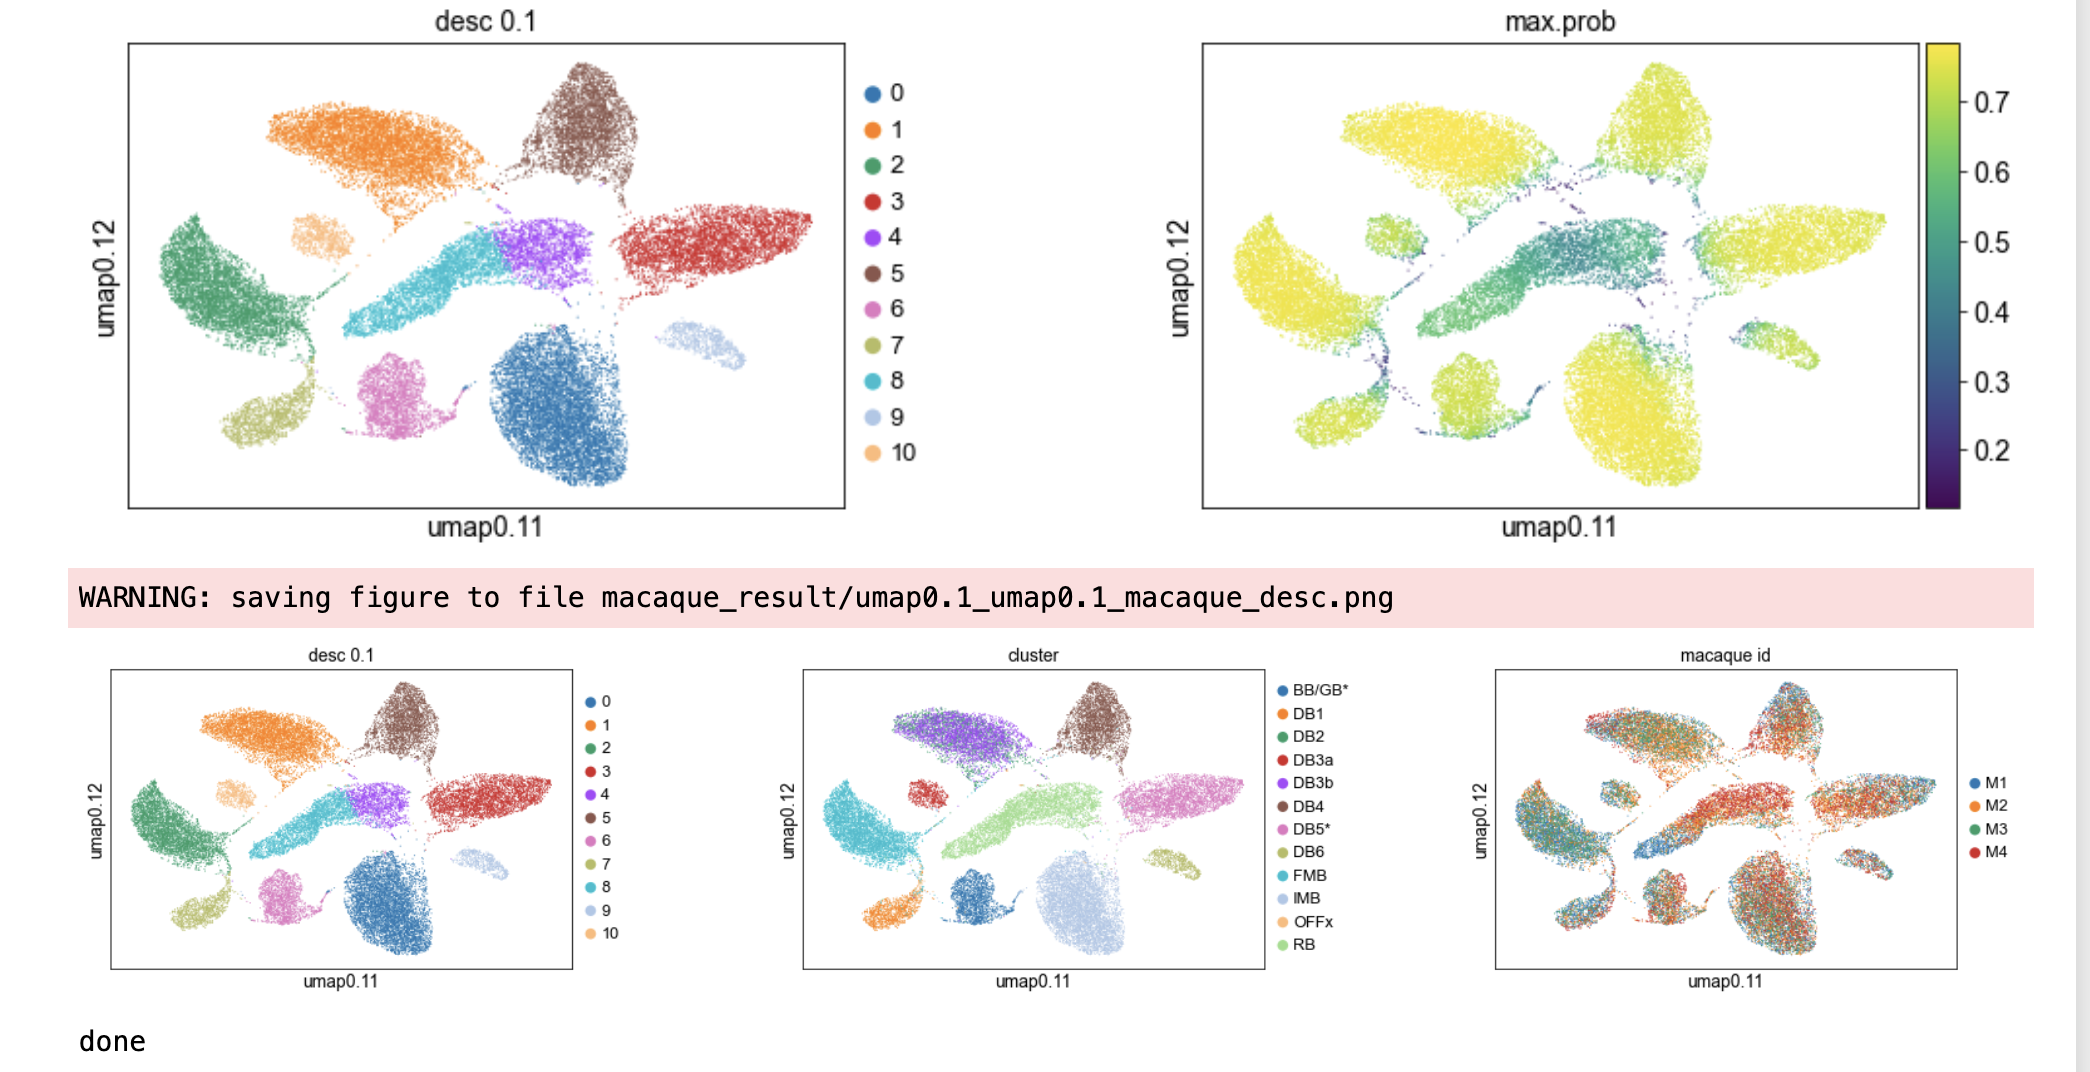